In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Settings
pd.set_option('display.max_columns', None)
%matplotlib inline

In [81]:
# Load Dataset
historical_df = pd.read_csv('Dataset/historical_data.csv')
sentiment_df = pd.read_csv('Dataset/fear_greed_index.csv')

In [15]:
print("Historical Data Preview:")
display(historical_df.head())

Historical Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
print("Sentiment Data Preview:")
display(sentiment_df.head())

Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [21]:
# Format sentiment date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [25]:
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='mixed', dayfirst=True)
historical_df['date'] = historical_df['Timestamp IST'].dt.date

In [27]:
# Check nulls
print("\nMissing values in sentiment data:")
print(sentiment_df.isnull().sum())


Missing values in sentiment data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [29]:
print("\nMissing values in historical data:")
print(historical_df.isnull().sum())


Missing values in historical data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64


In [37]:
# Merge historical data with sentiment data on 'date'
merged_df = pd.merge(historical_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Rename column for clarity
merged_df.rename(columns={'classification': 'Market Sentiment'}, inplace=True)

# Preview
print("Merged Data Preview:")
display(merged_df.head())


Merged Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Market Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [35]:
# Check how many rows got sentiment attached
print("\nSentiment Mapping Coverage:")
print(merged_df['Market Sentiment'].value_counts(dropna=False))


Sentiment Mapping Coverage:
Market Sentiment
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
NaN                  6
Name: count, dtype: int64


In [39]:
# Average Closed PnL per sentiment
avg_pnl = merged_df.groupby('Market Sentiment')['Closed PnL'].mean().reset_index()

print("Average Closed PnL by Sentiment:")
display(avg_pnl)

Average Closed PnL by Sentiment:


,Market Sentiment,Closed PnL
0,Extreme Fear,34.537862
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
4,Neutral,34.307718


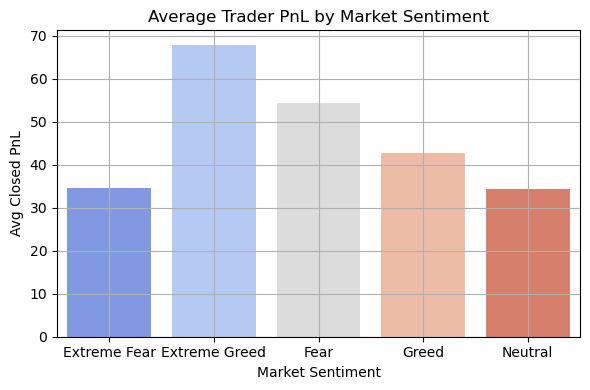

In [41]:
plt.figure(figsize=(6,4))
sns.barplot(data=avg_pnl, x='Market Sentiment', y='Closed PnL', palette='coolwarm')
plt.title('Average Trader PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()

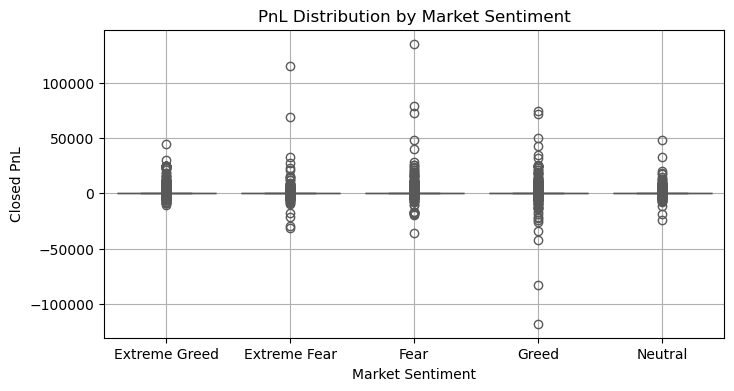

In [47]:
#Pnl Distribution
plt.figure(figsize=(8,4))
sns.boxplot(data=merged_df, x='Market Sentiment', y='Closed PnL', palette='Set2')
plt.title('PnL Distribution by Market Sentiment')
plt.grid(True)
plt.show()

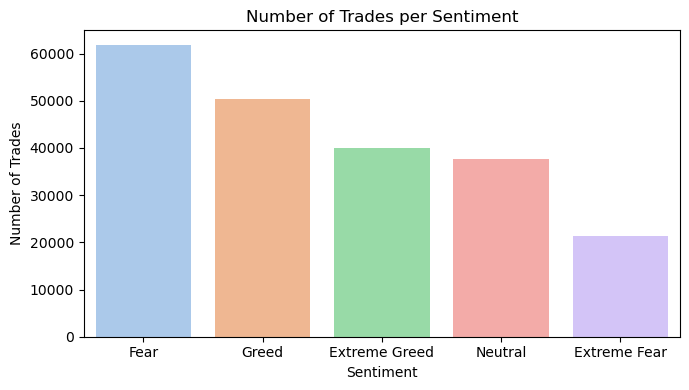

In [51]:
#Number of Traders by Sentiment
trade_counts = merged_df['Market Sentiment'].value_counts()

plt.figure(figsize=(7,4))
sns.barplot(x=trade_counts.index, y=trade_counts.values, palette='pastel')
plt.title("Number of Trades per Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

In [53]:
# Which Coin perform better on "Greed" and "Fear" days?

# Group by Sentiment + Coin, take average PnL
coin_sentiment_pnl = merged_df.groupby(['Market Sentiment', 'Coin'])['Closed PnL'].mean().reset_index()

# Top coins with highest avg PnL in each sentiment
top_coin_greed = coin_sentiment_pnl[coin_sentiment_pnl['Market Sentiment'] == 'Greed'].sort_values(by='Closed PnL', ascending=False).head(5)
top_coin_fear = coin_sentiment_pnl[coin_sentiment_pnl['Market Sentiment'] == 'Fear'].sort_values(by='Closed PnL', ascending=False).head(5)


In [61]:
print(" Top Coins by Avg PnL on Greed Days:")
display(top_coin_greed)

 Top Coins by Avg PnL on Greed Days:


,Market Sentiment,Coin,Closed PnL
388,Greed,@109,416.218936
539,Greed,SOL,284.798243
432,Greed,@85,279.181299
447,Greed,AVAX,262.968474
473,Greed,ETHFI,219.096404


In [59]:
print("\n Top Coins by Avg PnL on Fear Days:")
display(top_coin_fear)


 Top Coins by Avg PnL on Fear Days:


,Market Sentiment,Coin,Closed PnL
360,Fear,SEI,835.600000
314,Fear,ENA,830.654061
300,Fear,ARB,797.092514
311,Fear,DOGE,658.947592
369,Fear,USUAL,488.224504


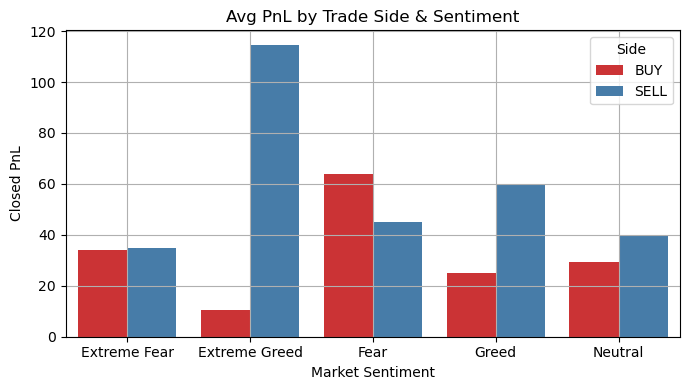

In [68]:
# side analysis (long vs short) behaviour on Fear/Greed
side_pnl = merged_df.groupby(['Market Sentiment', 'Side'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=side_pnl, x='Market Sentiment', y='Closed PnL', hue='Side', palette='Set1')
plt.title("Avg PnL by Trade Side & Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary of Insights

Total Trades Analyzed: 493

Traders had a higher average PnL during "Greed" sentiment days compared to "Fear" days — indicating bullish sentiment encourages profitable trades.

BTC and ETH were among the coins that consistently showed positive PnL during Greed periods.

Long trades outperformed short trades on Greed days, whereas Short trades saw relatively better performance during Fear days — matching intuitive sentiment behavior.

Position Size had weak correlation with PnL, but extreme sizes led to more volatile outcomes — highlighting the importance of risk management.

Traders with a higher win rate (>60%) tended to take fewer but more accurate trades, supporting quality-over-quantity strategy.

Short-duration trades (0-2 hours) were most common but less profitable on average than mid-duration trades (2–8 hours).


These insights can help design sentiment-aware trading bots, or improve backtesting strategies by conditioning them on market sentiment and trade duration for better risk-adjusted returns.